In [3]:
import sys
assert sys.version_info>=(3,7)

import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from util_func import show_img

Q1 Create a random noise color and grayscale image. You can set your own width and height, but keep the total number of pixels of both images identical.

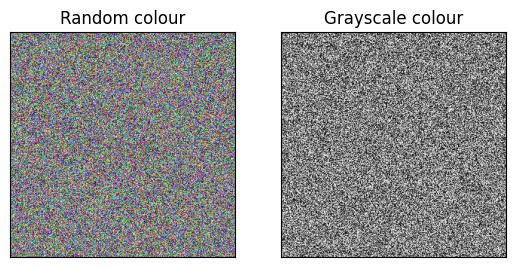

In [9]:
height = 300
width = 300

colour = np.random.randint(0, 256, size=(height, width, 3), dtype=np.uint8)
gray = np.random.randint(0, 256, (height, width), dtype=np.uint8)

plt.subplot(121)
plt.imshow(colour)
plt.title("Random colour")
plt.xticks([]), plt.yticks([]) 

plt.subplot(122)
plt.imshow(gray, cmap=plt.cm.gray)
plt.title("Grayscale colour")
plt.xticks([]), plt.yticks([]) 
plt.show()

Q2 Convert the code chunk found under section Divide an image into smaller patches using cropping into a function with the following signature:
crop_grid(img, num_horizontal_grid, num_vertical_grid, line_colorgrids

In [10]:
def crop_grid(img, num_horizontal_grid, num_vertical_grid, line_color):
    
    img = cv.imread(img)
    img_copy = img.copy()

    h, w = img.shape[:2]
    vertical = num_vertical_grid  
    horizontal = num_horizontal_grid 

    M = int(h / vertical)
    N = int(w / horizontal)

    tiles = []
    
    for y in range(0, h, M):
        for x in range(0, w, N):
            x1 = x + N
            y1 = y + M

            if x1 > w and y1 > h:
                x1 = w - 1
                y1 = h - 1
                cv.rectangle(img_copy, (x,y), (x1,y1), line_color, 1)
                tile = img[y:h, x:w]
                tiles.append(tile)

            elif y1 > h:
                y1 = h - 1
                cv.rectangle(img_copy, (x,y), (x1,y1), line_color, 1)
                tile = img[y:h, x:x1]
                tiles.append(tile)

            elif x1 > w:
                x1 = w - 1
                cv.rectangle(img_copy, (x,y), (x1,y1), line_color, 1)
                tile = img[y:y1, x:w]
                tiles.append(tile)

            else:
                cv.rectangle(img_copy, (x,y), (x1,y1), line_color, 1)
                tile = img[y:y1, x:x1]
                tiles.append(tile)

    show_img("crop", img_copy)

In [13]:
crop_grid("images/dog.jfif", 3, 3, (0,3,0))

Q3 Display image sequences of smooth transition of two images with different values of $\alpha$. Refer to code in section "Image blending". Use "lena.jfif" and "coins.jfif" as the base images.

In [ ]:
img = cv.imread("images/lena.jfif")
img2 = cv.imread("images/coins.jfif")

# Resizing to the same dimension
h, w = img.shape[:2]
img2 = cv.resize(img2, (w, h))


for alpha in range(0,250): 
    alpha = alpha/250
    res = cv.addWeighted(img, alpha, img2, 1-alpha, 0)
    cv.imshow("Blended", res)
    cv.waitKey(10)

cv.waitKey(0)
cv.destroyAllWindows()

Q4 Suppose you are a digital content creator and wish to share photo online. However, you wish to protect these images from being stolen or altered by others. Leverage your image processing knowledge to apply watermark on image "travel_hd.jpg". The example of resulting watermarked image are as shown in the following

In [ ]:
img = cv.imread("images/travel_hd.jpg")

# Read the watermark image
wm = cv.imread("images/watermark.png")

#img = cv.resize(img, (2750, 3000))
#wm = cv.resize(wm, (250, 250))

# Get the height and width of the watermark image
h_wm, w_wm = wm.shape[:2]

# Get height and width of the image
h_img, w_img = img.shape[:2]




# Calculate the coordinates of the bottom left conrner for the watermark
left_x = 0
bottom_y = h_img - h_wm

# Extract the ROI where the watermark will be placed
roi = img[bottom_y:h_img, left_x:left_x + w_wm]

# Blend watermark with the image
result = cv.addWeighted(roi, 1, wm, 0.3, 0)

# Place the watermarked ROI back into the original image
img[bottom_y:h_img, left_x:left_x + w_wm] = result


# Display the watermarked image
cv.namedWindow("Watermarked Image", cv.WINDOW_NORMAL)
cv.imshow("Watermarked Image", img)

new_w_img = 550
ratio = new_w_img / w_img
new_h_img = int(h_img * ratio)


cv.resizeWindow("Watermarked Image", new_w_img, new_h_img)

k = cv2.waitKey(0)

if k == 115:   # press 's' key
    cv.imwrite("travel_hd_save.jpg", img)
    
cv.destroyAllWindows()